# PCA

This notebook contains a PCA of the sensor data with two principal components. The main goal is to visualize this highly dimensional data.

In [1]:
# The basics
import pandas as pd
import numpy as np

# Cross validation and model selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Models
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.decomposition import PCA


# Plotting
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.pylab as pl
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.ticker as ticker
mpl.rc('font',family='Helvetica')
from plot_actual_vs_pred import plot_actual_vs_pred

# Models
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Reading data
sensor = pd.read_csv('../../data/sensor1.csv')
sensor.head(10)

,exposure,NO,NO2,NH3,0.05-1-slope-0,0.05-1-slope-1,0.05-1-slope-2,0.05-1-slope-3,0.05-1-slope-4,0.05-1-slope-5,...,2500.0-1-avg-230,2500.0-1-avg-231,5000.0-1-avg-232,5000.0-1-avg-233,5000.0-1-avg-234,5000.0-1-avg-235,5000.0-1-avg-236,5000.0-1-avg-237,5000.0-1-avg-238,5000.0-1-avg-239
0,1.0,10.0,5.0,20.0,-18.855169,-28.289268,-0.390916,-0.234549,-0.143336,0.026061,...,36.095859,36.118662,35.978584,35.880855,35.880855,35.867825,35.874340,35.825476,35.840135,35.845021
1,1.0,10.0,5.0,20.0,-28.979886,-9.251672,-0.247580,-0.169397,-0.218261,0.061895,...,36.115405,36.144723,35.978584,35.962296,35.919947,35.899858,35.910174,35.861309,35.884113,35.869996
2,1.0,10.0,5.0,20.0,-25.431240,-12.874158,-0.221519,-0.234549,0.026061,-0.312733,...,36.163183,36.141466,35.962296,35.926462,35.916689,35.910174,35.906916,35.903659,35.913432,35.900401
3,1.0,10.0,5.0,20.0,-30.126572,-8.196200,-0.260610,-0.091214,-0.130305,-0.182427,...,36.170784,36.164269,36.076313,35.978584,35.946008,35.942750,35.910174,35.933792,35.939493,35.900401
4,2.0,20.0,40.0,40.0,-19.506695,-27.051368,-0.456068,-0.403946,-0.208488,-0.256267,...,35.955781,35.929720,35.805930,35.760323,35.711458,35.688655,35.685397,35.675624,35.685397,35.665852
5,2.0,20.0,40.0,40.0,-25.357400,-13.043555,-0.469099,-0.130305,-0.221519,-0.026061,...,35.939493,35.916146,35.803487,35.704943,35.691913,35.701686,35.704943,35.701686,35.691913,35.698428
6,2.0,20.0,40.0,40.0,-27.557387,-10.983646,-0.524479,-0.065153,-0.156366,-0.117275,...,35.942750,35.884113,35.763581,35.698428,35.722046,35.695170,35.685397,35.688655,35.698428,35.675624
7,2.0,20.0,40.0,40.0,-26.569239,-12.027174,-0.338794,-0.195458,-0.130305,-0.026061,...,35.949266,35.916689,35.815703,35.734262,35.727747,35.714716,35.678882,35.708201,35.688655,35.708201
8,3.0,40.0,40.0,80.0,-20.431862,-26.334690,-0.390916,-0.351824,0.013031,-0.221519,...,35.929720,35.900401,35.789642,35.737519,35.682140,35.717974,35.714716,35.688655,35.678882,35.656079
9,3.0,40.0,40.0,80.0,-29.214435,-9.342886,-0.286672,-0.221519,-0.156366,0.026061,...,35.946008,35.974512,35.802672,35.724489,35.721231,35.698428,35.688655,35.691913,35.689469,35.688655


In [3]:
# Separating dependent and independent variables Y and X:
X = sensor.iloc[:, 4:]
Y = sensor.iloc[:, 1:4]

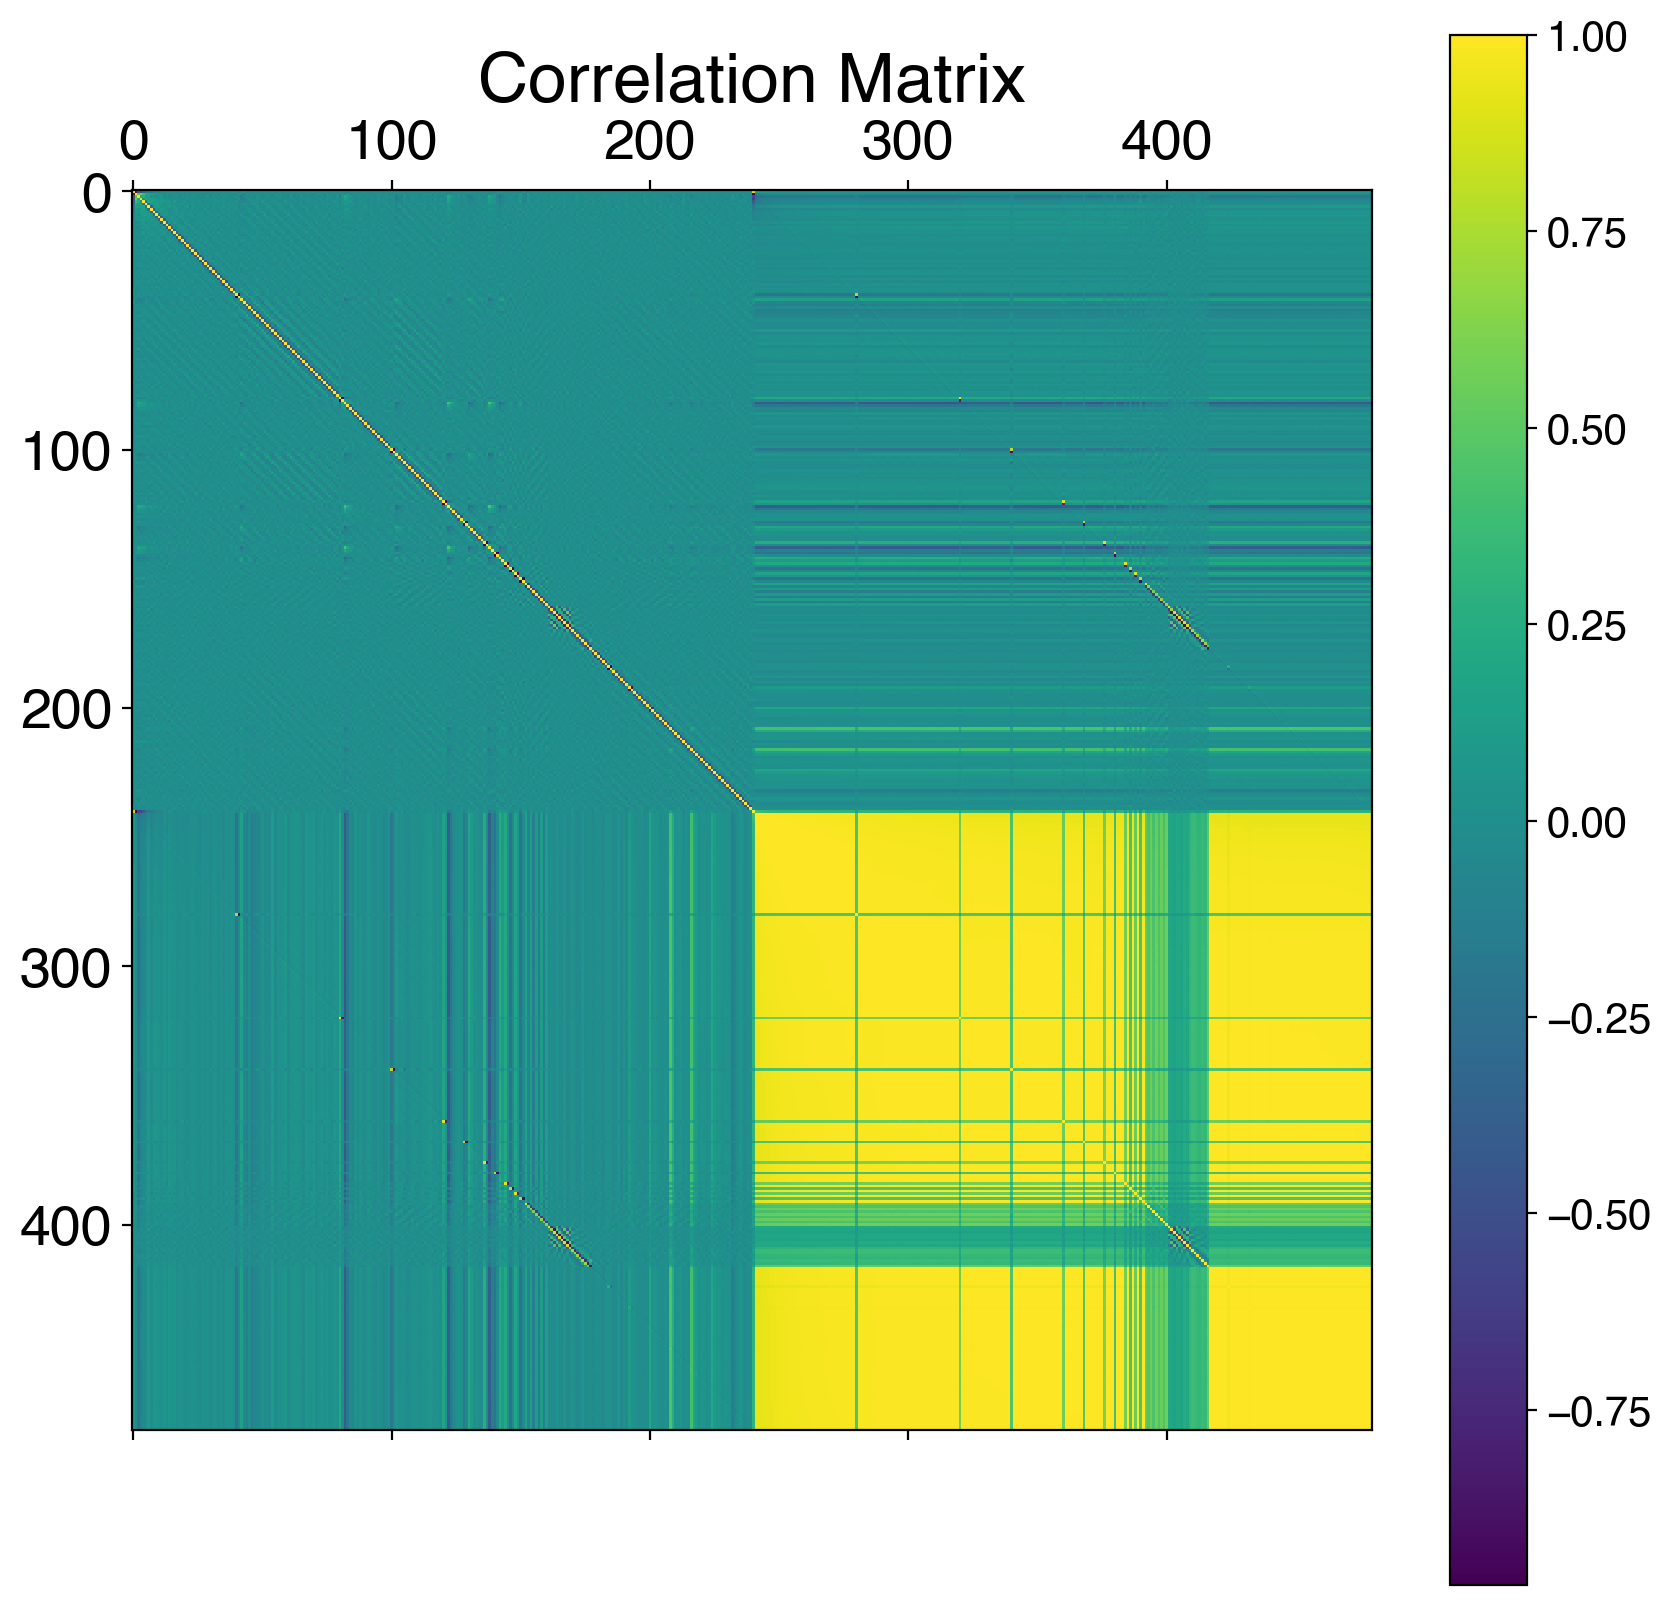

In [4]:
# Correlation Matrix
fig = plt.figure(figsize=(10, 10), dpi = 200)
plt.matshow(pd.DataFrame(X).corr(), fignum=fig.number)
plt.tick_params(axis='both', which='major', labelsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=15)
plt.title('Correlation Matrix', fontsize=25, fontname = 'Helvetica');
plt.show()

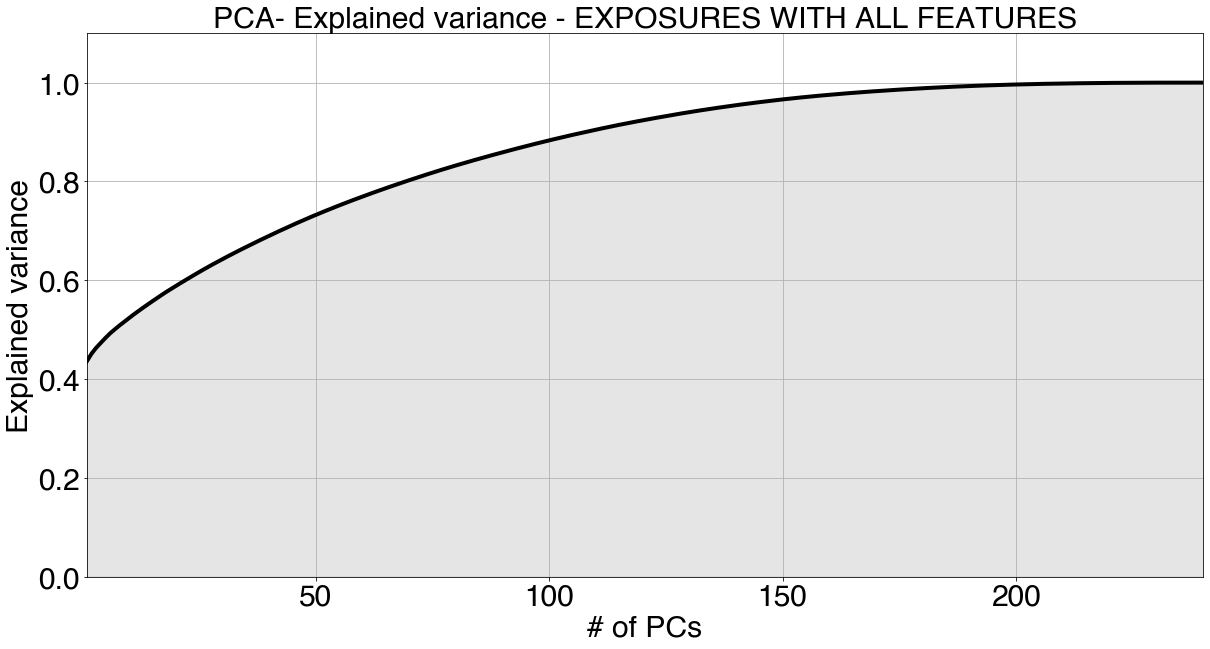

In [20]:
# Instatiating
pca = PCA()

# Fitting
scl = StandardScaler()
X = scl.fit_transform(X)
pcs = pca.fit(X)

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)


fig = plt.figure(figsize = (20,10))
plt.title('PCA- Explained variance - EXPOSURES WITH ALL FEATURES', fontsize = 30)
plt.ylim(0, 1.1)
plt.xlim(1,240)
plt.xlabel('# of PCs', fontsize = 30)
plt.ylabel('Explained variance', fontsize = 30)
plt.plot(
    range(1, exp_var_cumul.shape[0] + 1),
    exp_var_cumul,
    color = 'black', lw = 4
)
plt.fill_between(range(1, exp_var_cumul.shape[0] + 1), exp_var_cumul, color = 'black', alpha = 0.1)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.grid()
plt.savefig('../../figures/pcr-explained-variance.png')
plt.show()

In [6]:
# Running PCA with 2 components
# Instatiating
pca = PCA(n_components = 2)

# Fitting
pcs = pca.fit_transform(X)
pc_df = pd.DataFrame(pcs, columns = ['PC1', 'PC2']) 

In [7]:
# Summary
pca_df = pd.concat((Y, pc_df), axis = 1)
pca_df.head(10)

,NO,NO2,NH3,PC1,PC2
0,10.0,5.0,20.0,31.894334,-2.333199
1,10.0,5.0,20.0,34.107024,-0.520850
2,10.0,5.0,20.0,34.417747,-1.071967
3,10.0,5.0,20.0,34.620777,-3.710160
4,20.0,40.0,40.0,28.653259,0.022325
5,20.0,40.0,40.0,27.694336,3.057952
6,20.0,40.0,40.0,27.733063,2.825061
7,20.0,40.0,40.0,28.188074,0.381508
8,40.0,40.0,80.0,27.787965,3.640210
9,40.0,40.0,80.0,27.326197,-3.606593


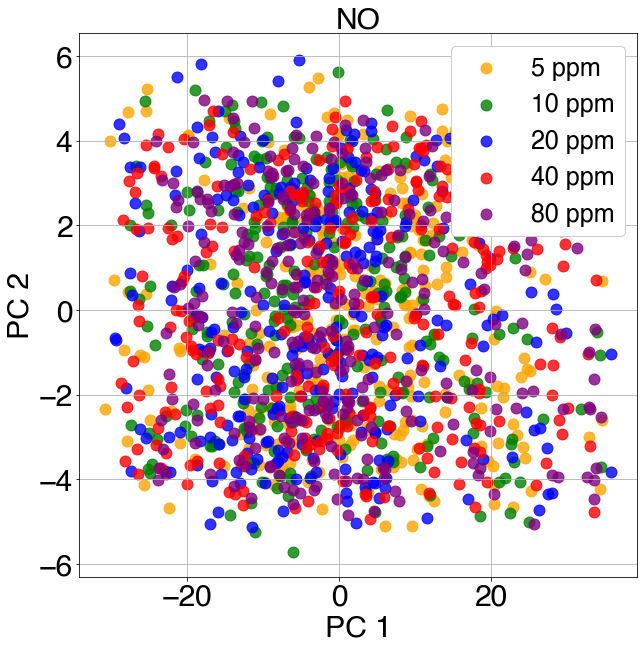

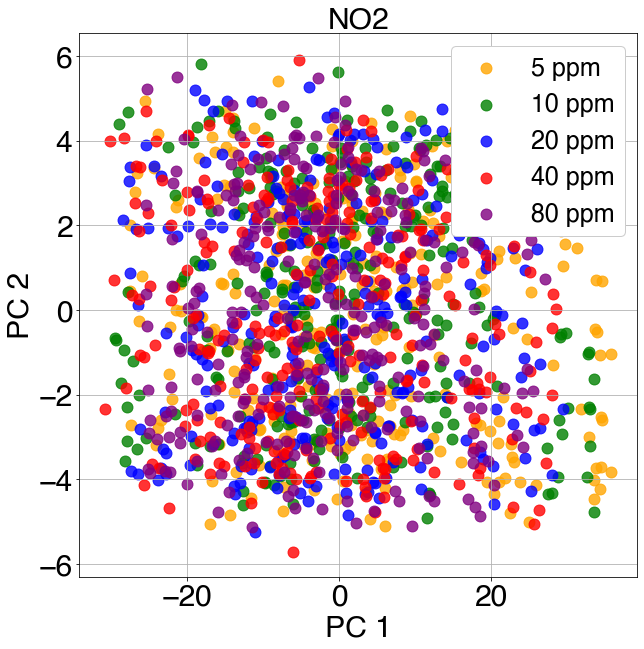

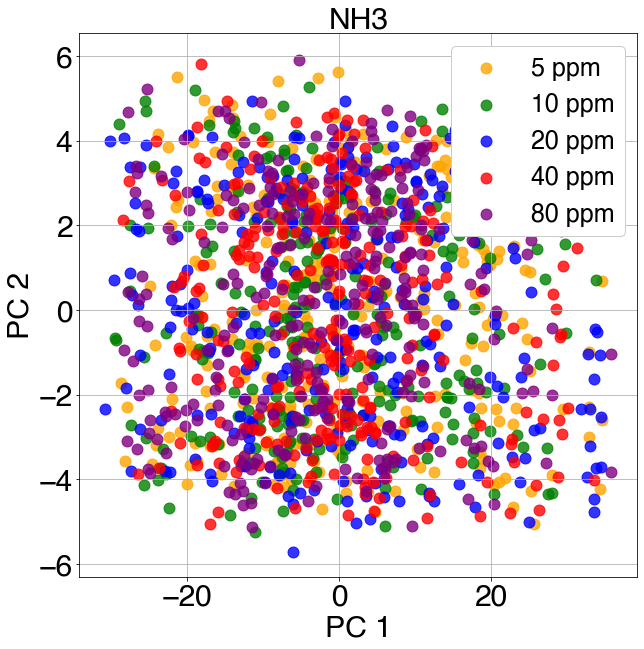

In [16]:
# Trying 2 components - useless

gasses = ['NO', 'NO2', 'NH3']
concentrations = [5, 10, 20, 40, 80]
colors = ['orange', 'green', 'blue', 'red', 'purple']


for gas in gasses:
    fig = plt.figure(figsize = (10,10))
    plt.xlabel('PC 1', fontsize = 30, fontname = 'Helvetica')
    plt.ylabel('PC 2', fontsize = 30, fontname = 'Helvetica')
    plt.title(gas, fontsize = 30, fontname = 'Helvetica')
    plt.tick_params(axis='both', which='major', labelsize=30)
    for conc, color in zip(concentrations, colors):
        
        idx = pca_df[gas] == conc
        pc1 = pca_df.loc[idx, 'PC1']
        pc2 = pca_df.loc[idx, 'PC2']
        plt.scatter(pc1, pc2, color = color, s = 120, alpha = 0.8)
    plt.legend(['5 ppm', '10 ppm', '20 ppm', '40 ppm', '80 ppm'], fontsize = 25, facecolor='white', framealpha=1)
    plt.grid()
    plt.show()

# PCR

In [9]:
# Train test split
X = np.array(sensor.iloc[:, 4:])
Y = np.array(sensor.iloc[:, 1:4])
X, X_val, Y, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
steps = [('scaler', StandardScaler()),
         ('PCA', PCA()),
         ('linreg', LinearRegression())]

n_PC = list(range(1,200))

params = [{'PCA__n_components':n_PC}]

pipe = Pipeline(steps)

grid_search = GridSearchCV(pipe,
                           params,
                           scoring = 'neg_root_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X, Y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

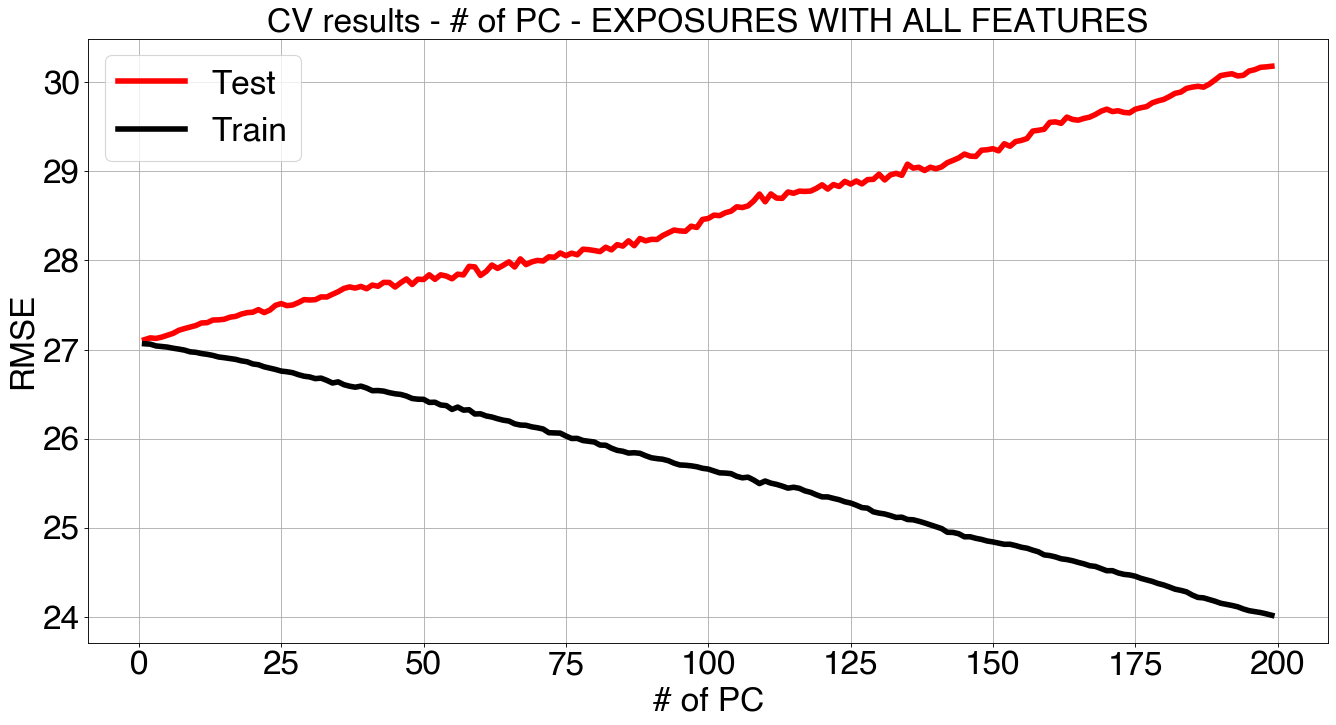

In [19]:
test_scores = -grid_search.cv_results_['mean_test_score']
train_scores = -grid_search.cv_results_['mean_train_score']

fig = plt.figure(figsize = (20,10), dpi = 80)
plt.title('CV results - # of PC - EXPOSURES WITH ALL FEATURES', fontsize = 30)
plt.xlabel('# of PC', fontsize = 30)
plt.ylabel('RMSE', fontsize = 30)
plt.plot(n_PC,test_scores, label='Test', lw = 5, color = 'red')
plt.plot(n_PC,train_scores, label='Train', lw = 5, color = 'black')
plt.tick_params(axis='both', which='major', labelsize=30)
plt.grid()
plt.legend(loc='best', fontsize = 30)
#plt.savefig('../../figures/pcr-cv-exposures.png')
plt.show()

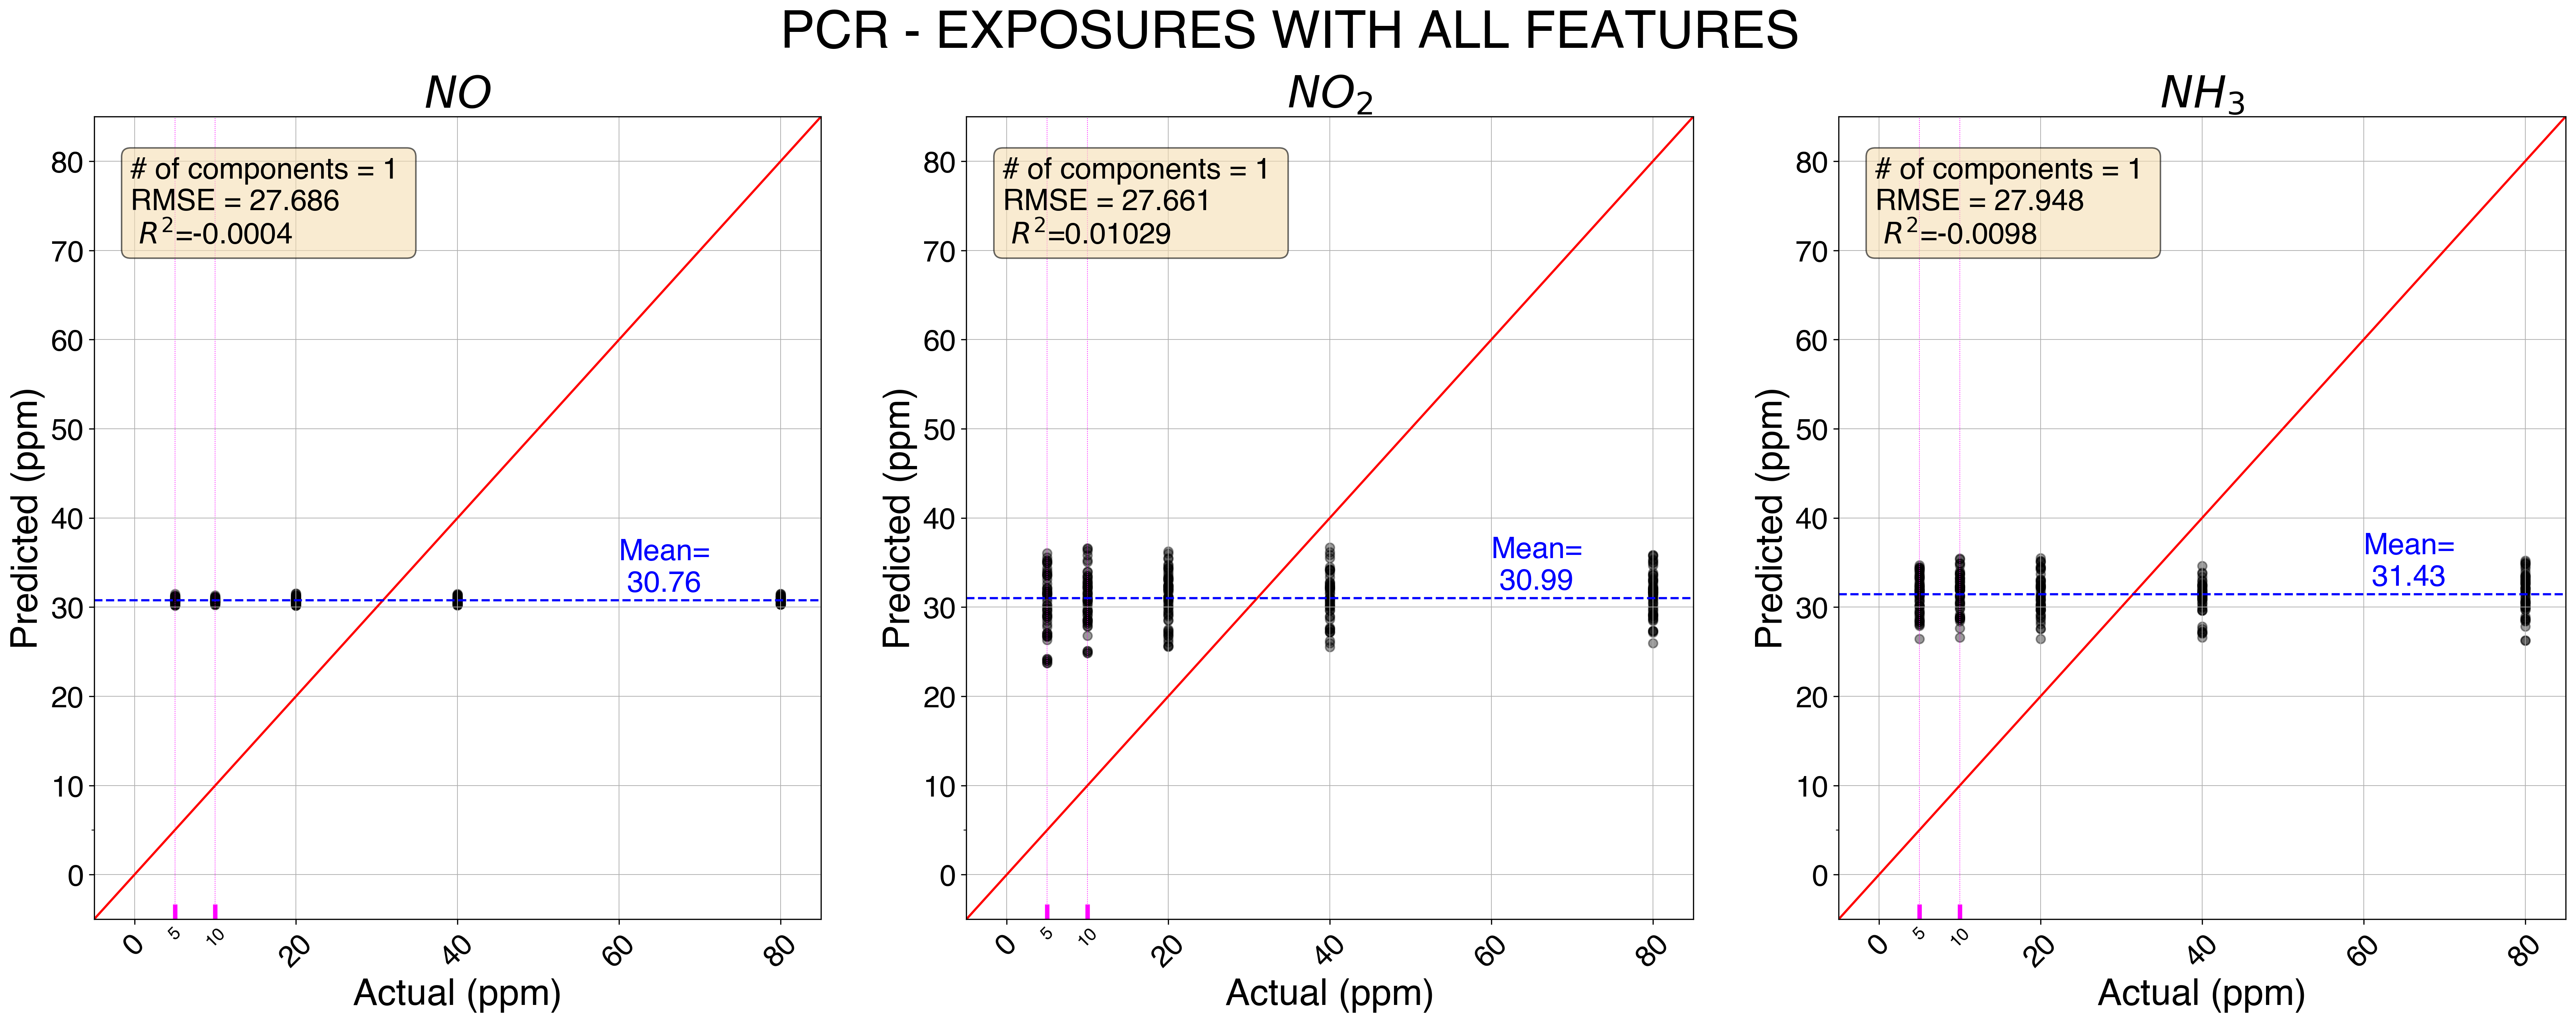

In [12]:
# Predicting on unseen validation data
Y_pred = grid_search.best_estimator_.predict(X_val)

# Plotting actual vs. predicted
#Information to display
RMSEs = np.round(mean_squared_error(Y_val, Y_pred, squared=False, multioutput = 'raw_values'), 3)
Rsquares = np.round(r2_score(Y_val, Y_pred, multioutput = 'raw_values'), 5)

info = [f"# of components = {best_params['PCA__n_components']} \nRMSE = {RMSEs[i]}\n $R^2$={Rsquares[i]}" for i in range(3)]
plot_actual_vs_pred(Y_val, Y_pred, 'PCR - EXPOSURES WITH ALL FEATURES', info)    